In [2]:
from music21 import converter, corpus, instrument, midi, note, chord, pitch


In [3]:
file = converter.parse('stalker.mid')
# for part in file:
#     print(part)

In [77]:
file[1].measures(1,7).show('text')

{0.0} <music21.stream.Measure 1 offset=0.0>
    {0.0} <music21.instrument.Bass 'Bass: Bass'>
    {0.0} <music21.instrument.FretlessBass 'Fretless Bass'>
    {0.0} <music21.clef.BassClef>
    {0.0} <music21.tempo.MetronomeMark Quarter=112.0>
    {0.0} <music21.key.Key of C major>
    {0.0} <music21.meter.TimeSignature 1/4>
    {0.0} <music21.note.Rest quarter>
{1.0} <music21.stream.Measure 2 offset=1.0>
    {0.0} <music21.key.Key of E- major>
    {0.0} <music21.meter.TimeSignature 4/4>
    {0.0} <music21.note.Rest dotted-quarter>
    {1.5} <music21.note.Note F#>
    {2.5} <music21.note.Note G>
    {3.5} <music21.note.Note F#>
{5.0} <music21.stream.Measure 3 offset=5.0>
    {0.0} <music21.note.Note F#>
    {0.5} <music21.note.Note G>
    {1.5} <music21.note.Note F#>
    {2.5} <music21.note.Note G>
    {3.0} <music21.note.Note E>
{9.0} <music21.stream.Measure 4 offset=9.0>
    {0.0} <music21.note.Rest dotted-quarter>
    {1.5} <music21.note.Note F#>
    {2.5} <music21.note.Note G>
    {3.

In [89]:
for nt in file[1].measures(1,7).flat.getElementsByClass(['Rest']):
    print(nt,nt.offset,nt.duration.quarterLength)


<music21.note.Rest quarter> 0.0 1.0
<music21.note.Rest dotted-quarter> 1.0 1.5
<music21.note.Rest dotted-quarter> 9.0 1.5
<music21.note.Rest dotted-quarter> 17.0 1.5


In [11]:
for nt in file[0].measures(1,7).flat.getElementsByClass(['Note','Chord']):
    print(nt)
    print(nt.pitches[-1].ps)

<music21.note.Note F#>
78.0
<music21.note.Note F#>
78.0
<music21.note.Note F#>
78.0
<music21.note.Note F#>
78.0
<music21.chord.Chord F#4 F#5>
78.0
<music21.chord.Chord F#4 F#5>
78.0


In [7]:
a = []
for thisNote in file[0].measures(1,7).flat.getElementsByClass(['Note', 'Rest','Chord']):
    a.append(thisNote)
print(a)

[<music21.note.Rest quarter>, <music21.note.Note F#>, <music21.note.Note F#>, <music21.note.Note F#>, <music21.note.Note F#>, <music21.chord.Chord F#4 F#5>, <music21.chord.Chord F#4 F#5>]


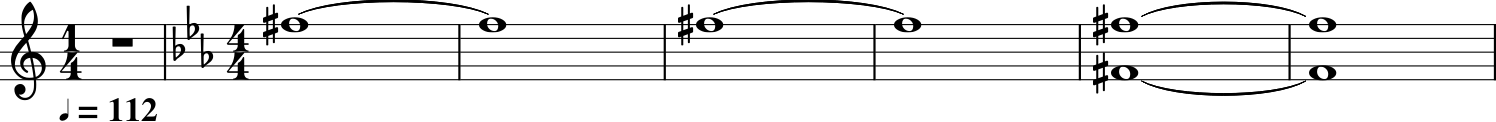

In [8]:
file[0].measures(1,7).show()

In [9]:
a[-1].pitches,a[-1].duration.quarterLength/4

((<music21.pitch.Pitch F#4>, <music21.pitch.Pitch F#5>), 1.0)

In [20]:
 for nt in file[0].flat.getElementsByClass(['Rest']):
        print(nt.duration.quarterLength/4)

0.25
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.25
0.25
0.25


In [66]:
import numpy as np
def get_pitches(phrase):
    pitches_list = []
    for nt in phrase.flat.getElementsByClass(['Note','Chord']):
        pitches_list.append(nt.pitches[-1].ps)
    return pitches_list

phrase = file[1].measures(1,7)
pitches_list = get_pitches(phrase)
pitches_list

[42.0,
 43.0,
 42.0,
 42.0,
 43.0,
 42.0,
 43.0,
 40.0,
 42.0,
 43.0,
 42.0,
 42.0,
 43.0,
 42.0,
 43.0,
 47.0,
 43.0,
 42.0,
 43.0,
 42.0,
 42.0,
 43.0,
 42.0,
 43.0,
 40.0]

In [71]:
num_pitches = len(pitches_list)
unique,counts = np.unique(pitches_list,return_counts=True)
# dict(zip(unique, counts/num_pitches))
pitch_entropy = [-p*np.log(p) for p in counts/num_pitches]

In [75]:
sum(pitch_entropy)

1.0496348213275466